In [6]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from statistics import mean


In [7]:

# class prediction function
def predict(w  , b , x):
        w = np.dot(x , w) + b
        y_predict = 1/(1+np.exp(-w))
        predict_result = [1 if i>0.5 else 0 for i in y_predict]
        return predict_result

#Logistic Regression loss function
def loss(h , l) : 
    return (-l * np.log(h) - (1 - l) * np.log(1 - h)).sum()

#calculating true&positive,false&positive,false&negative,true&negative
def evaluate(y_predicted , y):
    
    tp=0
    fp=0
    fn=0
    tn=0
    k=0
    for x in y_predicted :
        if x==1:
            if y[k] == 1:
                tp=tp+1
            else:
                fp=fp+1
        else:
            if y[k] == 1:
                fn=fn+1
            else:
                tn=tn+1
        k=k+1
    return tp,fp,tn,fn
        

In [8]:
#Using gradient decent for Logistic Regression

def LogisticRegression(lrate  , iter  , X  , y) :
  
    rows , featrs  = X.shape #returns rows n columns
    weights = np.zeros(featrs)  #weights
    bias = 0  # bias
    y = y.reshape((y.shape[0],))
    
    los = []
    acc = []

    #calculating weigts, bias,loss,accuracy using gradient decent

    for i in range(iter):
        w = np.dot(X , weights) + bias    #weight 
        
        y_pred = 1/(1+np.exp(-w))    #  prediction value
        
        #weight and bias errors calculation
        delta_w = np.dot(X.T , y_pred - y)
        delta_b = np.sum(y_pred - y)
        
        # weights and bias updation
        weights = weights - lrate*(delta_w)
        bias = bias - lrate*(delta_b)
        
        binary_pred = [1 if i>0.5 else 0 for i in y_pred]     # class prediction 
      
        if i%50 == 0 :
            #appending the loss
            los.append(loss(y_pred , y))  
            
            #appending the accuracy
            acc.append(((binary_pred == y).sum()/len(y)))  
      
    return weights,bias,los,acc
    

In [9]:
#Logistic regression using stochastic gradient decent 

def LogisticRegressionSGD(lrate, iter , X  , y) :
    los=[]
    acc=[]
    rows , featrs  = X.shape #returns rows n columns
    weights = np.zeros(featrs)    # weights
    bias = 0    # bias
    y = y.reshape((y.shape[0],))
    iter_no = 0
    
    #calculating weigts, bias,loss,accuracy using stochastic gradient decent

    for i in range(iter):
         
        #chosing a random entry
        random_number = random.randint(0, len(y)-1)   
        x_b, y_b = X[random_number], y[random_number]

        w = np.dot(x_b, weights) + bias    #weight 
        
        y_pred = 1/(1+np.exp(-w))    # prediction value
        
        #weight and bias errors calculation
        delta_w = np.dot(x_b.T , y_pred - y_b)
        delta_b = np.sum(y_pred - y_b)
        
        # weights and bias updation
        weights = weights - lrate*(delta_w)
        bias = bias - lrate*(delta_b)
            
        binary_pred = predict(weights,bias,X)  #classifying class 
            
        iter_no+=1
            
        if iter_no%50==0:
             #appending the loss
            los.append(loss(y_pred , y_b))  

             #calculating true/false positives/negatives  
            tp,fp,tn,fn = evaluate(binary_pred , y)
            
               #appending accuracy
            acc.append((tp+tn)/(tp+tn+fp+fn))     

    return weights,bias,los,acc      


In [10]:
#read and standardize ( (x-mean)/SD ) data


df = pd.read_csv('/content/dataset_LR.csv')

column_name = np.array(df.columns)
column_name = column_name[:-1]
for i in column_name:
    col = np.array(df[i])
    mean_column = np.mean(col)
    std_column = np.std(col)
    norm_column = []
    for j in col:
        norm_column.append((j-mean_column)/std_column)
    df[i] = norm_column

df.head()

,attr1,attr2,attr3,attr4,class
0,1.121806,1.149455,-0.975970,0.354561,0
1,1.447066,1.064453,-0.895036,-0.128767,0
2,1.207810,-0.777352,0.122218,0.618073,0
3,1.063742,1.295478,-1.255397,-1.144029,0
4,-0.036772,-1.087038,0.736730,0.096587,0


In [11]:
# We created lists here to append them and calculate their averages
Accuracy =[]
Accuracy_t =[]
AccuracySGD=[]
AccuracySGD_t=[]

Loss=[]
LossSGD =[]

Fscore = []
Fscore_t = []
FscoreSGD=[]
FscoreSGD_t=[]

Precision=[]
Precision_t=[]
PrecisionSGD =[]
PrecisionSGD_t =[]

Recall=[]
Recall_t=[]
RecallSGD=[]
RecallSGD_t=[]

wGD=[]
bGD=[]
wSGD=[]
bSGD=[]

In [25]:

for j in range(10):     
    lrate= 0.001
    no_iter=10000
    
        
    #read and create 70:30 train-test splits
    df_random = df.sample(frac=1)
    rows , cols = df_random.shape
    a = int((70*rows)/100)
    df_train =  df_random.head(a)
    df_test =  df_random.tail(rows-a)

    X = df_train.iloc[: , 0:4]
    y = df_train.iloc[: ,-1:]

    np_X = X.to_numpy()
    np_y = y.to_numpy()

    #calling function return values for Gradient Descent and Stocastic Gradient Descent
    weights,bias,los, acc = LogisticRegression(lrate , no_iter , np_X , np_y)
    wGD.append(weights)
    bGD.append(bias)
    weightsSGD , biasSGD , lSGD , aSGD = LogisticRegressionSGD(lrate , no_iter, np_X , np_y)
    wSGD.append(weightsSGD)
    bSGD.append(biasSGD)

    print(" ")
    
    print("----------Gradient Descent for " + str(j) + "--------------")
    
    print("GD weights:",weights)
    print("GD bias:",bias)
    print("Loss :",los[-1])
    
    print("TRAINING DATASET")
    
    predicted = predict(weights , bias , np_X)
    tp,fp,tn,fn = evaluate(predicted , np_y)
    
    #calculating precision,recall,f1 score,accuracy
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1 = 2/((1/recall) + (1/precision))
    accuracy= (tp+tn)/(tp+tn+fp+fn)
    
    
    print("Recall :",recall)
    print("Precision :",precision)
    print("F1 score :",f1)
    print("Accuracy : ",accuracy)
    
    #appending precision,recall,f1 score,accuracy
    Accuracy.append(accuracy)
    Loss.append(los[-1])
    Fscore.append(f1)
    Precision.append(precision)
    Recall.append(recall)
    

    print("TESTING DATASET")
    
    X_test = df_test.iloc[: , 0:4]
    y_test = df_test.iloc[: , -1:]

    np_X_t = X_test.to_numpy()
    np_y_t = y_test.to_numpy()
    np_y_t = np_y_t.reshape((np_y_t.shape[0],))
        
    predicted = predict(weights , bias , np_X_t)
    tp,fp,tn,fn = evaluate(predicted , np_y_t)
    
    #calculating precision,recall,f1 score,accuracy
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1 = 2/((1/recall) + (1/precision))
    accuracy= (tp+tn)/(tp+tn+fp+fn)
    
    
    print("Recall :",recall)
    print("Precision :",precision)
    print("F1 score :",f1)
    print("Accuracy : ",accuracy)
    print(" ")
    
    #appending precision,recall,f1 score,accuracy
    Accuracy_t.append(accuracy)
    Fscore_t.append(f1)
    Precision_t.append(precision)
    Recall_t.append(recall)
    
    print("-------------Stochastic Gradient Descent-------------")
    
    print("SGD Weights : ",weightsSGD)
    print("SGD Bias : ",biasSGD)
    print("Loss :",lSGD[-1])

    
    print("TRAINING DATASET")
    
    predicted = predict(weightsSGD , biasSGD , np_X)
    tp,fp,tn,fn = evaluate(predicted , np_y)
    
    #calculating precision,recall,f1 score,accuracy
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1 = 2/((1/recall) + (1/precision))
    accuracy= (tp+tn)/(tp+tn+fp+fn)
    
    
    print("Recall :",recall)
    print("Precision :",precision)
    print("F1 score :",f1)
    print("Accuracy : ",accuracy)
        
    #appending precision,recall,f1 score,accuracy
    AccuracySGD.append(accuracy)
    LossSGD.append(lSGD[-1])
    FscoreSGD.append(f1)
    PrecisionSGD.append(precision)
    RecallSGD.append(recall)
    
    print("TESTING DATASET")
    predicted = predict(weightsSGD , biasSGD , np_X_t)
    tp,fp,tn,fn = evaluate(predicted , np_y_t)
    
    #calculating precision,recall,f1 score,accuracy
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1 = 2/((1/recall) + (1/precision))
    accuracy= (tp+tn)/(tp+tn+fp+fn)
    
    
    print("Recall :",recall)
    print("Precision :",precision)
    print("F1 score :",f1)
    print("Accuracy : ",accuracy)
    print(" ")
    
    #appending precision,recall,f1 score,accuracy
    AccuracySGD_t.append(accuracy)
    FscoreSGD_t.append(f1)
    PrecisionSGD_t.append(precision)
    RecallSGD_t.append(recall)
    

 
----------Gradient Descent for 0--------------
GD weights: [-11.12604431 -11.77680625 -10.81337226   0.11312046]
GD bias: -4.832180866894962
Loss : 18.05842138421894
TRAINING DATASET
Recall : 0.9976635514018691
Precision : 0.9861431870669746
F1 score : 0.9918699186991871
Accuracy :  0.9927083333333333
TESTING DATASET
Recall : 0.989010989010989
Precision : 0.9782608695652174
F1 score : 0.9836065573770493
Accuracy :  0.9854368932038835
 
***************************************Stochastic Gradient Descent************************************
SGD Weights :  [-1.53185234e+00 -8.91241537e-01 -4.32923263e-01  7.28766601e-07]
SGD Bias :  -0.2543797145395495
Loss : 0.8295554577982065
TRAINING DATASET
Recall : 0.9205607476635514
Precision : 0.933649289099526
F1 score : 0.9270588235294118
Accuracy :  0.9354166666666667
TESTING DATASET
Recall : 0.8956043956043956
Precision : 0.9106145251396648
F1 score : 0.9030470914127423
Accuracy :  0.9150485436893204
 
 
----------Gradient Descent for 1--------

In [27]:
#calculating mean of weights,bias gradient descent

final_wGD=[0,0,0,0]

for i in range(10):
    final_wGD=final_wGD + wGD[i]
    
final_wGD=final_wGD/10
final_bGD=mean(bGD)

In [28]:
#calculating mean weights,bias Stocastic Gradient Descent

final_wSGD=[0,0,0,0]

for i in range(10):
    final_wSGD=final_wSGD + wSGD[i]
    
final_wSGD=final_wSGD/10
final_bSGD=mean(bSGD)


In [29]:
print("**************AVERAGE VALUES************** ")

print(" ")
print(" GRADIENT DECENT ")
print(" ")

print("GD weights: ",final_wGD)
print("GD bias: ",final_bGD)
print("Loss :",mean(Loss))
print(" ")

print("TRAINING GRADIENT DECENT ")
print("Accuracy :" ,mean(Accuracy))
print("Precision :",mean(Precision))
print("Recall :",mean(Recall))
print("F score :",mean(Fscore))

print(" ")
print("TESTING GRADIENT DECENT")
print("Accuracy :" ,mean(Accuracy_t))
print("Precision :",mean(Precision_t))
print("Recall :",mean(Recall_t))
print("F score :",mean(Fscore_t))

print(" ")
print("STOCHASTIC GRADIENT DECENT ")
print(" ")

print("SGD weights: ",final_wSGD)
print("SGD bias: ",final_bSGD)
print("Loss :",mean(LossSGD))
print(" ")

print("TRAINING STOCHASTIC GRADIENT DECENT")
print("Accuracy :" ,mean(AccuracySGD))
print("Precision :",mean(PrecisionSGD))
print("Recall :",mean(RecallSGD))
print("F score :",mean(FscoreSGD))

print(" ")
print("TESTING STOCHASTIC GRADIENT DECENT")
print("Accuracy :" ,mean(AccuracySGD_t))
print("Precision :",mean(PrecisionSGD_t))
print("Recall :",mean(RecallSGD_t))
print("F score :",mean(FscoreSGD_t))

**************AVERAGE VALUES************** 
 
 GRADIENT DECENT 
 
GD weights:  [-11.08686128 -12.19632824 -11.1885238   -0.15758037]
GD bias:  -5.066691985988147
Loss : 20.394113767696222
 
TRAINING GRADIENT DECENT 
Accuracy : 0.990625
Precision : 0.985001786155549
Recall : 0.9940430843366468
F score : 0.9894990997995502
 
TESTING GRADIENT DECENT
Accuracy : 0.9877253814147018
Precision : 0.9818936805408839
Recall : 0.9908636291227119
F score : 0.9863116239511974
 
STOCHASTIC GRADIENT DECENT 
 
SGD weights:  [-1.51384039 -0.90358582 -0.42313638 -0.02135423]
SGD bias:  -0.24805238923753878
Loss : 0.2987219474504733
 
TRAINING STOCHASTIC GRADIENT DECENT
Accuracy : 0.9302083333333333
Precision : 0.9255705732609548
Recall : 0.916657398806063
F score : 0.9210361383880895
 
TESTING STOCHASTIC GRADIENT DECENT
Accuracy : 0.9255201109570041
Precision : 0.9243361142162776
Recall : 0.9075010571645994
F score : 0.9155651751010614


LEARNING RATE : 0.001 
 
GD weights:  [-10.94535305 -12.17455068 -11.15969102  -0.22585929]
GD bias:  -5.1179172376949245
GD accuracy:  0.9895833333333334


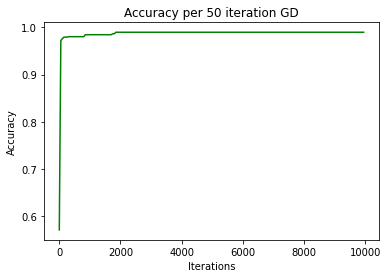

 SGD weights:  [-1.53991772 -0.88566803 -0.40073152  0.01952483]
 SGD bias:  -0.28606529186291685
SGD accuracy:  0.9385416666666667


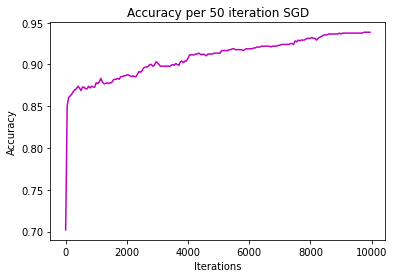

 
 
 
LEARNING RATE : 0.0001 
 
GD weights:  [-5.95455787 -6.48726212 -5.94542489  0.23096751]
GD bias:  -2.2467483719420094
GD accuracy:  0.9833333333333333


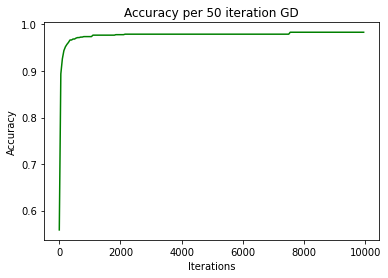

 SGD weights:  [-0.30471263 -0.18144367  0.03283415 -0.0222002 ]
 SGD bias:  -0.04902858516716482
SGD accuracy:  0.8552083333333333


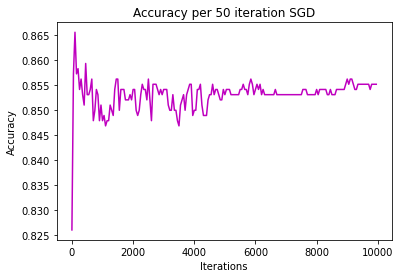

 
 
 
LEARNING RATE : 1e-05 
 
GD weights:  [-3.45877776 -2.94991837 -2.76858562  0.22688043]
GD bias:  -0.7544957107279279
GD accuracy:  0.975


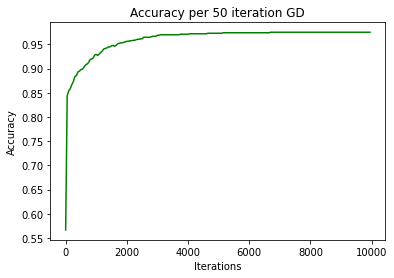

 SGD weights:  [-0.03455287 -0.02006025  0.00539162 -0.00172608]
 SGD bias:  -0.007779701148333731
SGD accuracy:  0.8375


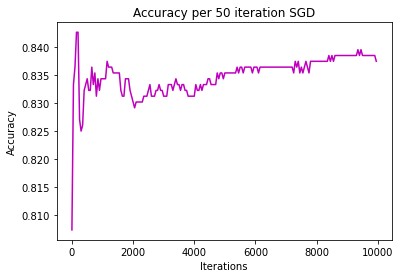

In [30]:
#for THREE different learning rates

LearningRate = [0.001 , 0.0001 , 0.00001]

for lrate in LearningRate :
    print('LEARNING RATE :',lrate,'')
    print(' ')
    
    #reading the data, shuffling it and making 70:30 split
    df_random = df.sample(frac=1)
    rows , cols = df_random.shape
    a = int((70*rows)/100)
    df_train =  df_random.head(a)
    df_test =  df_random.tail(rows-a)

    X = df_train.iloc[: , 0:4]
    y = df_train.iloc[: ,-1:]

    np_X = X.to_numpy()
    np_y = y.to_numpy()
    
    #calling function return values
    weights , bias , los, acc= LogisticRegression(lrate , no_iter , np_X , np_y)
    weightsSGD , biasSGD , lSGD , aSGD = LogisticRegressionSGD(lrate ,no_iter , np_X , np_y)

    iter = []
    for i in range(len(los)):
        iter.append(i*50)
 
    print("GD weights: ",weights)
    print("GD bias: ",bias)
    print("GD accuracy: ",(acc[-1]))
    plt.plot(iter,acc,label="Gradient Descent",color='g')
    plt.title("Accuracy per 50 iteration GD")
    plt.xlabel("Iterations")
    plt.ylabel("Accuracy")
    plt.show()
        


    print(" SGD weights: ",weightsSGD)
    print(" SGD bias: ",biasSGD)
    print("SGD accuracy: ",(aSGD[-1]))
    plt.plot(iter,aSGD,label="Stochastic Gradient Descent",color='m')
    plt.title("Accuracy per 50 iteration SGD")
    plt.xlabel("Iterations")
    plt.ylabel("Accuracy")
    plt.show()
    print(' ')
    print(' ')
    print(' ')

    


    